# Shot By Shot Exploratory Data Analysis

In [1]:
# Importing Relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

## Reading in cleaned dataframe

In [2]:
shot_data = pd.read_csv('shot_dataset.csv')
shot_data = shot_data.drop(columns = ['Unnamed: 0'])

In [3]:
print(shot_data)

         SHOT_MADE  SHOT_TYPE  LOC_X  LOC_Y  SHOT_DISTANCE  MINS_LEFT  \
0                1          0   23.4  12.95             24         11   
1                1          1   -1.3   5.25              1         10   
2                0          1   -2.2   6.95              2          8   
3                1          0   19.7  20.55             24          7   
4                1          0   -8.3  29.85             25          7   
...            ...        ...    ...    ...            ...        ...   
2947516          1          1   -0.0   5.25              0         11   
2947517          1          1   -0.0   5.25              0         11   
2947518          1          1   -0.0   5.25              0         11   
2947519          1          1   14.3  11.35             15         11   
2947520          1          1   11.3   7.55             11         11   

         SECS_LEFT    MP    FG%    3P%  ...  Reverse Slam Dunk Shot  \
0               20  36.0  0.451  0.300  ...         

In [4]:
print(shot_data.columns)

Index(['SHOT_MADE', 'SHOT_TYPE', 'LOC_X', 'LOC_Y', 'SHOT_DISTANCE',
       'MINS_LEFT', 'SECS_LEFT', 'MP', 'FG%', '3P%', '2P%', 'eFG%', 'Season',
       'DEF_RTG', 'Jump Shot', 'Running Finger Roll Layup Shot',
       'Driving Layup Shot', 'Pullup Jump shot',
       'Driving Finger Roll Layup Shot', 'Tip Layup Shot',
       'Step Back Jump shot', 'Driving Reverse Layup Shot',
       'Running Reverse Layup Shot', 'Layup Shot', 'Running Pull-Up Jump Shot',
       'Dunk Shot', 'Reverse Layup Shot', 'Running Dunk Shot',
       'Floating Jump shot', 'Driving Floating Jump Shot',
       'Cutting Layup Shot', 'Putback Layup Shot', 'Turnaround Jump Shot',
       'Turnaround Fadeaway shot', 'Running Jump Shot', 'Cutting Dunk Shot',
       'Turnaround Hook Shot', 'Running Layup Shot', 'Driving Dunk Shot',
       'Fadeaway Jump Shot', 'Cutting Finger Roll Layup Shot',
       'Running Alley Oop Layup Shot', 'Driving Floating Bank Jump Shot',
       'Running Alley Oop Dunk Shot', 'Driving Hook Shot

## Looking at correlation values

In [22]:
# correlations
correlations = shot_data.corr()
made_correlations = correlations['SHOT_MADE']
made_correlations = made_correlations.drop(index = ['SHOT_MADE'])


<class 'pandas.core.series.Series'>


In [28]:
made_correlations = pd.DataFrame(made_correlations).rename(columns = {'SHOT_MADE':'Correlation Values'})
print(made_correlations)

                             Correlation Values
SHOT_TYPE                              0.127774
LOC_X                                 -0.003829
LOC_Y                                 -0.140882
SHOT_DISTANCE                         -0.202218
MINS_LEFT                              0.015182
...                                         ...
Driving Finger Roll Shot               0.005647
Finger Roll Shot                       0.000250
Follow Up Dunk Shot                    0.003145
Turnaround Finger Roll Shot            0.009042
Running Finger Roll Shot               0.001019

[83 rows x 1 columns]


                                Correlation Values
Driving Hook Shot                        -0.215475
SHOT_DISTANCE                            -0.202218
LOC_Y                                    -0.140882
SHOT_TYPE                                 0.127774
Turnaround Jump Shot                      0.104757
Jump Shot                                 0.075079
Driving Layup Shot                        0.075040
Floating Jump shot                        0.074565
FG%                                       0.074082
Running Tip Shot                          0.073922
Driving Reverse Layup Shot                0.066795
Driving Reverse Dunk Shot                 0.066219
2P%                                       0.055965
Driving Finger Roll Layup Shot            0.054615
Hook Bank Shot                            0.049707
Running Reverse Layup Shot                0.047738
No Shot                                   0.045818
3P%                                      -0.044845
Alley Oop Layup shot           

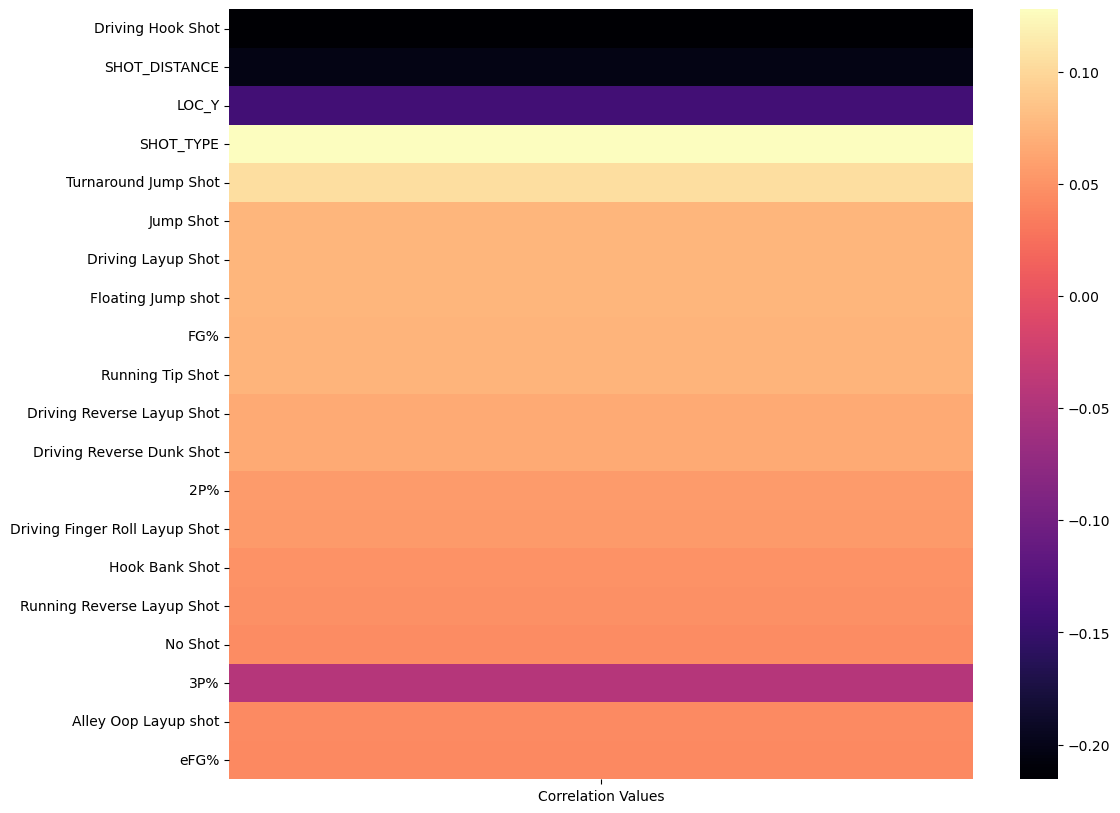

In [93]:
made_correlations = made_correlations.sort_values(by =['Correlation Values'], key = abs, ascending = False)
correlations_20 = made_correlations.head(20)
print(correlations_20)

# heatmap
plt.figure(figsize = (12,10))
sns.heatmap(correlations_20, cmap = 'magma')
plt.show()

# Finding Top 20 Most Common Shot Action Type

In [94]:
shot_actions = ['Jump Shot', 'Running Finger Roll Layup Shot',
       'Driving Layup Shot', 'Pullup Jump shot',
       'Driving Finger Roll Layup Shot', 'Tip Layup Shot',
       'Step Back Jump shot', 'Driving Reverse Layup Shot',
       'Running Reverse Layup Shot', 'Layup Shot', 'Running Pull-Up Jump Shot',
       'Dunk Shot', 'Reverse Layup Shot', 'Running Dunk Shot',
       'Floating Jump shot', 'Driving Floating Jump Shot',
       'Cutting Layup Shot', 'Putback Layup Shot', 'Turnaround Jump Shot',
       'Turnaround Fadeaway shot', 'Running Jump Shot', 'Cutting Dunk Shot',
       'Turnaround Hook Shot', 'Running Layup Shot', 'Driving Dunk Shot',
       'Fadeaway Jump Shot', 'Cutting Finger Roll Layup Shot',
       'Running Alley Oop Layup Shot', 'Driving Floating Bank Jump Shot',
       'Running Alley Oop Dunk Shot', 'Driving Hook Shot', 'Putback Dunk Shot',
       'Hook Shot', 'Alley Oop Dunk Shot', 'Tip Dunk Shot',
       'Alley Oop Layup shot', 'Hook Bank Shot', 'Driving Bank Hook Shot',
       'Reverse Dunk Shot', 'Jump Bank Shot', 'Turnaround Bank shot',
       'Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Turnaround Fadeaway Bank Jump Shot', 'Turnaround Bank Hook Shot',
       'Step Back Bank Jump Shot', 'Driving Reverse Dunk Shot',
       'Running Reverse Dunk Shot', 'Pullup Bank shot', 'Driving Bank shot',
       'Driving Jump shot', 'No Shot', 'Running Hook Shot', 'Slam Dunk Shot',
       'Running Bank shot', 'Tip Shot', 'Putback Slam Dunk Shot',
       'Running Tip Shot', 'Driving Slam Dunk Shot', 'Jump Hook Shot',
       'Reverse Slam Dunk Shot', 'Running Slam Dunk Shot',
       'Running Bank Hook Shot', 'Jump Bank Hook Shot',
       'Putback Reverse Dunk Shot', 'Driving Finger Roll Shot',
       'Finger Roll Shot', 'Follow Up Dunk Shot',
       'Turnaround Finger Roll Shot', 'Running Finger Roll Shot']

# What shot has the greatest conversion percent

In [95]:
bar_values = []
for col in shot_actions:
    if col in shot_data:
        amount = shot_data[col].sum()
        bar_values.append(amount)


In [96]:
# limiting the data to only made shots
made_shots = shot_data[shot_data['SHOT_MADE'] == 1]

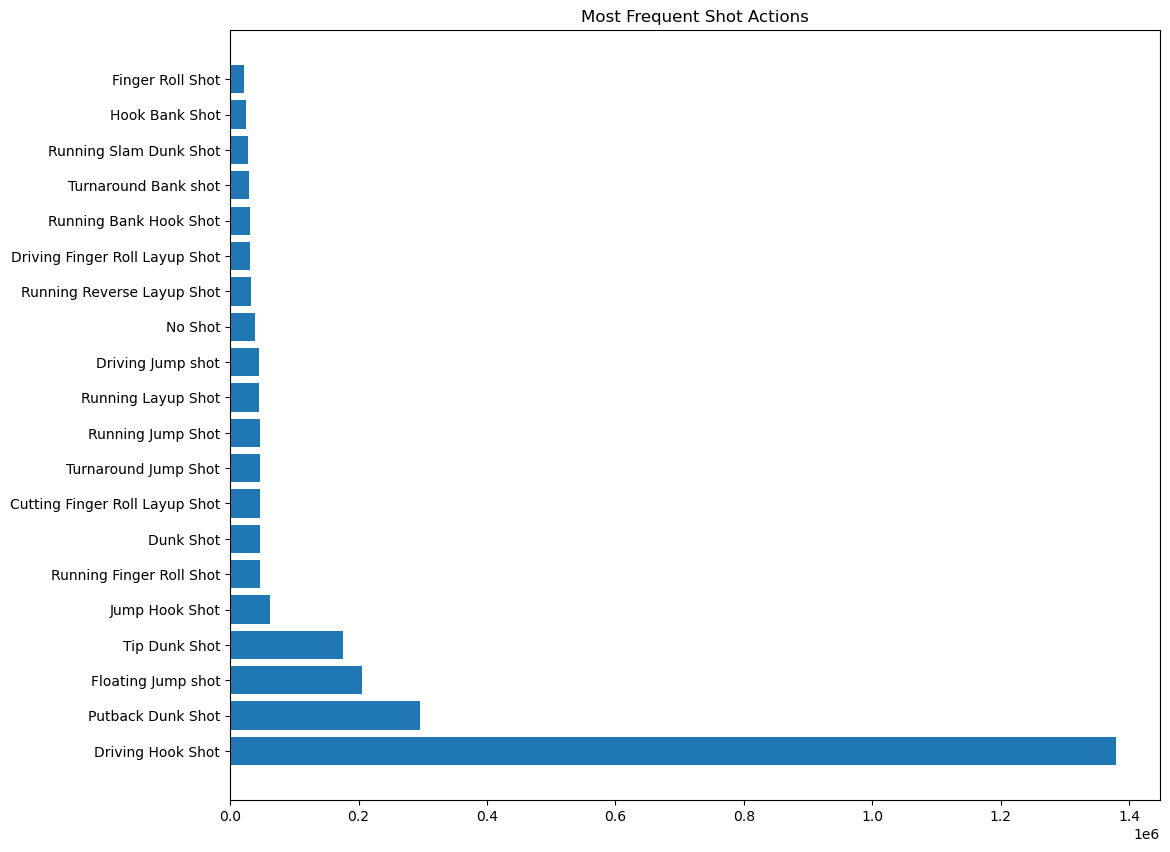

In [97]:
bar_df = pd.DataFrame(bar_values, index = [shot_actions], columns = ['Count'])
bar_df = bar_df.sort_values(by = ['Count'], ascending = False)
bar_df = bar_df.head(20)

top20_index = []
for i in range(len(bar_df)):
    top20_index.append(bar_df.index[i][0])

plt.figure(figsize = (12,10))
plt.barh(top20_index, bar_df['Count'])
plt.title('Most Frequent Shot Actions')
plt.show()


In [67]:
# Getting the counts for each action type given that the shot was made
made_values = []
for col in shot_actions:
    if col in made_shots:
        amount = made_shots[col].sum()
        made_values.append(amount)

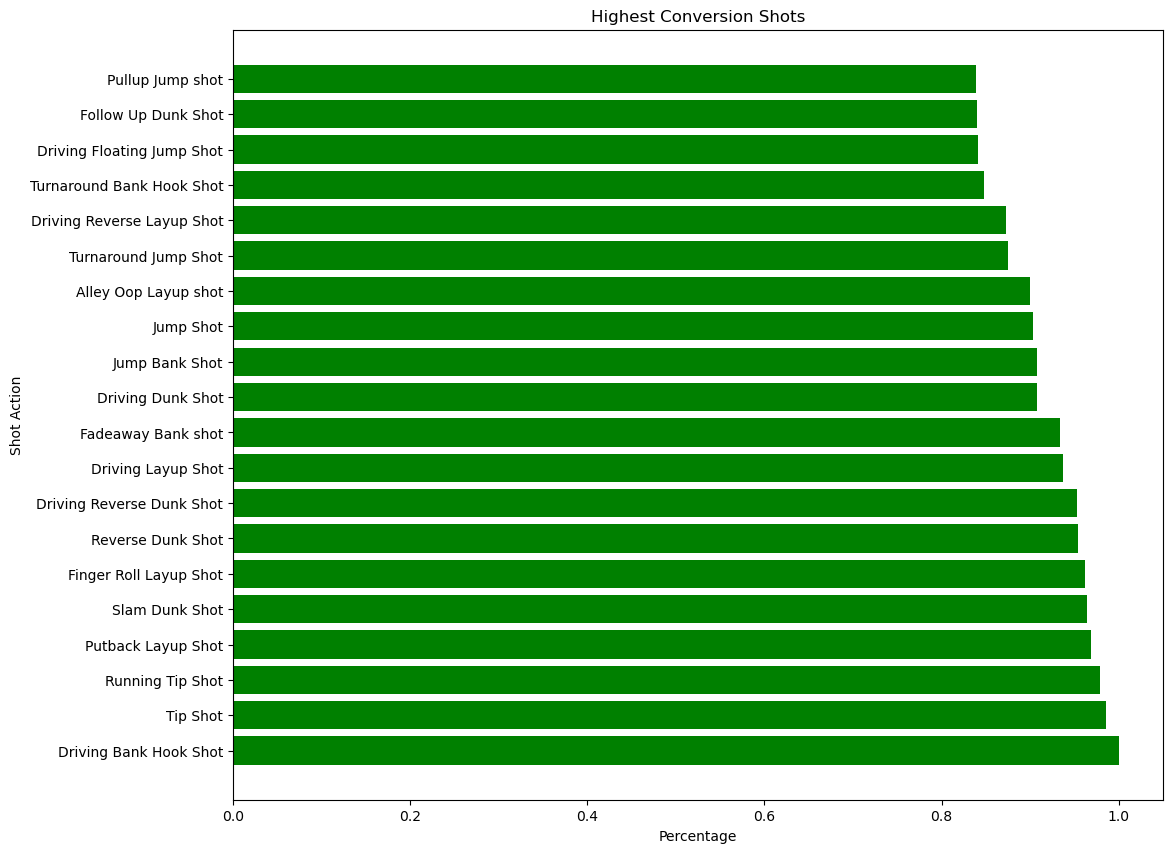

In [82]:
# Finding conversion percentage (made shots of that action type/ total shot attempts of that action type)
conversion = np.array(made_values)/np.array(bar_values)

conversion_df = pd.DataFrame(conversion, index = [shot_actions], columns = ['Percentage'])
conversion_df = conversion_df.sort_values(by = ['Percentage'], ascending = False)
conversion_highest_df = conversion_df.head(20)
conversion_lowest_df = conversion_df.tail(20)

highest20_index = []
for i in range(len(conversion_highest_df)):
    highest20_index.append(conversion_highest_df.index[i][0])

plt.figure(figsize = (12,10))
plt.barh(highest20_index, conversion_highest_df['Percentage'], color = 'green')
plt.ylabel('Shot Action')
plt.xlabel('Percentage')
plt.title('Highest Conversion Shots')
plt.show()

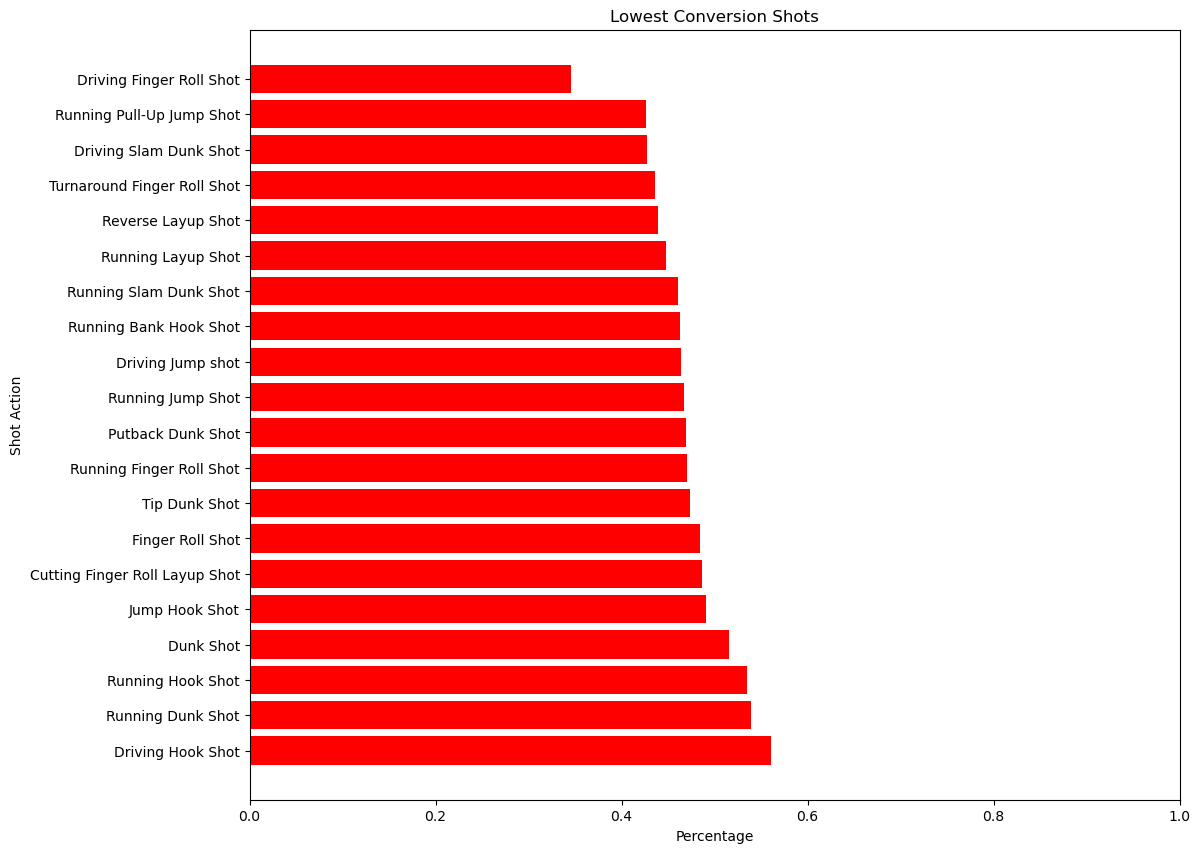

In [83]:
lowest20_index = []
for i in reversed(range(len(conversion_highest_df))):
    lowest20_index.append(conversion_lowest_df.index[i][0])

plt.figure(figsize = (12,10))
plt.barh(lowest20_index, conversion_lowest_df['Percentage'], color = 'red')
plt.ylabel('Shot Action')
plt.xlabel('Percentage')
plt.title('Lowest Conversion Shots')
plt.xlim(0,1)
plt.show()